In [1]:
from datasets.behavior import *
from common.utils import *
from common.plot_utils import *
from common.train_utils import *

In [2]:
full_dataset = BehaviourDataset('./behavior.csv')

### Train/Val

In [3]:
val_size = 0.2
val_inds = subset_ind(full_dataset, 0.2)

In [4]:
train_dataset = Subset(full_dataset, [i for i in range(len(full_dataset)) if i not in val_inds])
val_dataset = Subset(full_dataset, val_inds)

print(f'train size: {len(train_dataset)}\nval size: {len(val_dataset)}')

train size: 40000
val size: 10000


### Dataloaders

In [5]:
BATCH_SIZE = 1

In [6]:
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=True)

### NN Model

In [7]:
loss_function = torch.nn.BCELoss()

In [8]:
class Reshape(torch.nn.Module):
    def __init__(self, *args):
        super().__init__()
        self.shape = args

    def forward(self, x):
        return x.view(self.shape)

In [9]:
model = torch.nn.Sequential(
    torch.nn.Linear(105, 64),
    torch.nn.ReLU(),
    torch.nn.Linear(64, 32),
    torch.nn.Linear(32, 16),
    torch.nn.ReLU(),
    torch.nn.Linear(16, 1),
    torch.nn.Sigmoid()
)

optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)

### Train

In [10]:
EPOCHS = 40

In [11]:
train_loss, val_loss, val_accuracy = train_model(model, train_loader, val_loader, loss_function, optimizer, EPOCHS)

Epoch 1/40. time: 35.883s
train loss: 0.487560
val loss: 0.499885
validation acc: 0.771900


Epoch 2/40. time: 38.032s
train loss: 0.453253
val loss: 0.452331
validation acc: 0.786800


Epoch 3/40. time: 36.937s
train loss: 0.439093
val loss: 0.442980
validation acc: 0.784300


Epoch 4/40. time: 36.318s
train loss: 0.430400
val loss: 0.434737
validation acc: 0.798700


Epoch 5/40. time: 36.262s
train loss: 0.421483
val loss: 0.432597
validation acc: 0.797300


Epoch 6/40. time: 37.073s
train loss: 0.415667
val loss: 0.441800
validation acc: 0.748100


Epoch 7/40. time: 34.289s
train loss: 0.411098
val loss: 0.422844
validation acc: 0.806800


Epoch 8/40. time: 34.047s
train loss: 0.407091
val loss: 0.423631
validation acc: 0.801000


Epoch 9/40. time: 32.683s
train loss: 0.405518
val loss: 0.423769
validation acc: 0.805700


Epoch 10/40. time: 36.309s
train loss: 0.402630
val loss: 0.418618
validation acc: 0.813500


Epoch 11/40. time: 36.343s
train loss: 0.400486
val loss: 0.434310
va

In [12]:
torch.save(model, 'behavior_clf_40_epoch.pth')

### Results

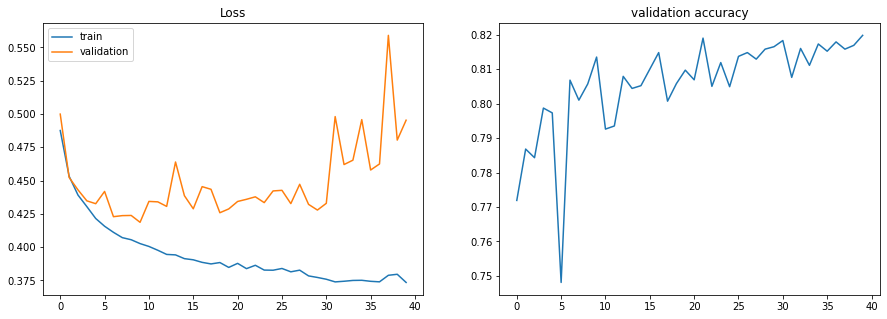

In [13]:
plot_train(train_loss, val_loss, val_accuracy)